This Notebook is mostly for exploring the hdf5 datasets to get stats about them such as distribution of tokens lengths for URLs and html_content

In [1]:
import h5py
from transformers import DistilBertTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Path to the h5py file
file_path = '/Users/imack/transfer/phishing_output_tokenized.h5'

with h5py.File(file_path, 'r') as h5_file:
    html_content_dataset = h5_file['dev/html_content']
    
    token_lengths = []
    
    for idx in tqdm(range(len(html_content_dataset)), desc=f'Tokenizing', unit='entry'):
        content = html_content_dataset[idx]
        token_lengths.append(len(tokenizer.tokenize(str(content.decode('utf-8')))))


/opt/homebrew/Caskroom/miniforge/base/envs/phishing-edge/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Tokenizing: 100%|██████████| 7126/7126 [08:05<00:00, 14.69entry/s]


12018.276031434185
10966.892766676048


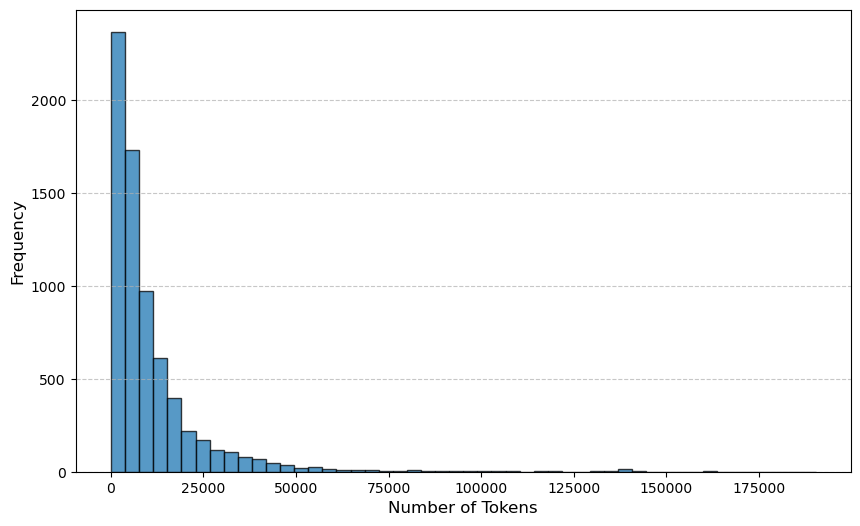

In [3]:
import numpy as np
print(sum(token_lengths)/len(token_lengths))
token_lengths_np = np.array(token_lengths)
filtered_lengths = token_lengths_np[token_lengths_np <= 200_000]
print(sum(filtered_lengths)/len(filtered_lengths))

plt.figure(figsize=(10, 6))
plt.hist(filtered_lengths, bins=50, alpha=0.75, edgecolor='black')
plt.xlabel("Number of Tokens", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
import torchvision
from dataset.phishing_dataset import PhishingDataset
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import random
import os

dataset_path = os.path.expanduser("~/transfer/phishing_output.h5")

dataset = PhishingDataset(required_data=['image', 'url', 'label'], split='dev', local_file_path=dataset_path)

def get_random_image(dataset):

    sample = {'label': 0}
    while sample['label'] != 1:
        random_index = random.randint(0, len(dataset) - 1)
        sample = dataset[random_index]

    screenshot_image = dataset.screenshots[random_index]
    plt.figure(figsize=(256, 170))
    plt.imshow(screenshot_image)
    plt.axis('off')
    plt.savefig('phish_screenshot.png', bbox_inches='tight')
    plt.show()
    print(sample['url'])

    return sample, random_index

# Example usage with a sample image
tensor_image, class_idx = get_random_image(dataset)
print(dataset.labels[class_idx])


/opt/homebrew/Caskroom/miniforge/base/envs/phishing-edge/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


KeyboardInterrupt: 